<a href="https://colab.research.google.com/github/PaulinaTarkowsk/sql_recap/blob/main/zadanie_1%20las%20losowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/drive')

dataset_path = '/drive/My Drive/Machine Learning/Google Colab/zajecia_2/Dzień 3/heart_data_normalized.csv'

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(dataset_path)
df.head(15)

,sex_male,chestpain_nonanginal,chestpain_nontypical,chestpain_typical,fbs_yes,restecg_1,restecg_2,exang_yes,thal_normal,thal_reversable,ahd_yes,age,restbp,chol,maxhr,oldpeak,slope,ca
0,1,0,0,1,1,0,1,0,0,0,0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.000000
1,1,0,0,0,0,0,1,1,1,0,1,0.791667,0.622642,0.365297,0.282443,0.241935,0.5,1.000000
2,1,0,0,0,0,0,1,1,0,1,1,0.791667,0.245283,0.235160,0.442748,0.419355,0.5,0.666667
3,1,1,0,0,0,0,0,0,0,1,0,0.166667,0.339623,0.260274,0.885496,0.564516,1.0,0.000000
4,0,0,1,0,0,0,1,0,0,0,0,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,0.000000
5,1,0,1,0,0,0,0,0,1,0,0,0.562500,0.245283,0.251142,0.816794,0.129032,0.0,0.000000
6,0,0,0,0,0,0,1,0,1,0,1,0.687500,0.433962,0.324201,0.679389,0.580645,1.0,0.666667
7,0,0,0,0,0,0,0,1,1,0,0,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,0.000000
8,1,0,0,0,0,0,1,0,0,1,1,0.708333,0.339623,0.292237,0.580153,0.225806,0.5,0.333333
9,1,0,0,0,1,0,1,1,0,1,1,0.500000,0.433962,0.175799,0.641221,0.500000,1.0,0.000000


In [40]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score

In [13]:
X = df.drop('ahd_yes', axis=1)
y = df['ahd_yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [14]:
dt = DecisionTreeRegressor(random_state=42)

from sklearn.metrics import mean_absolute_error

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

0.2857142857142857


In [21]:
from typing import Any
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs = 8)

In [22]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

0.27164835164835166


In [ ]:
rf = RandomForestRegressor(random_state=42, n_estimators=100, oob_score=True)

In [38]:
# prompt: zrób gird search dla rf = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor object
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_rf = grid_search.best_estimator_



Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
# Evaluate the best estimator on the test data
y_pred = best_rf.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

In [25]:
rf = RandomForestRegressor(random_state=42, n_estimators=100, oob_score=True)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))


0.27164835164835166


In [27]:
dataset_path = '/drive/My Drive/Machine Learning/Google Colab/zajecia_2/Dzień 3/diamonds_preprocessed.csv'
df_diamonds = pd.read_csv(dataset_path)
df_diamonds.head(15)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,4,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,1,5,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4,4,4,59.4,61.0,338,4.00,4.05,2.39


In [35]:
from sklearn.model_selection import train_test_split

X = df_diamonds.drop("price", axis=1)
y = df_diamonds["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
dt = DecisionTreeRegressor(random_state=42)

from sklearn.metrics import mean_absolute_error

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

358.3396722325294


In [ ]:
rf = RandomForestRegressor(random_state=42, n_jobs = 8)

In [46]:
# prompt: Stwórz obiekt RandomizedSearchCV, z którego wykorzystaniem dobierzesz najlepszy zestaw parametrów ze zdefiniowanej siatki params do modelu rf_regressor. Metryką, którą będziemy chcieli obliczać będzie mean_squared_error.

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for the RandomForestRegressor
param_grid = {
    'n_estimators': [50, 75, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor object
rf_regressor = RandomForestRegressor(random_state=42)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_mean_squared_error',  # Use negative MSE as scoring metric
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best score (negative MSE):", random_search.best_score_)

# Get the best estimator
best_rf_regressor = random_search.best_estimator_

# Evaluate the best estimator on the test data
y_pred = best_rf_regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 75, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Best score (negative MSE): -310635.9961386062
Mean Squared Error: 287792.11582540645


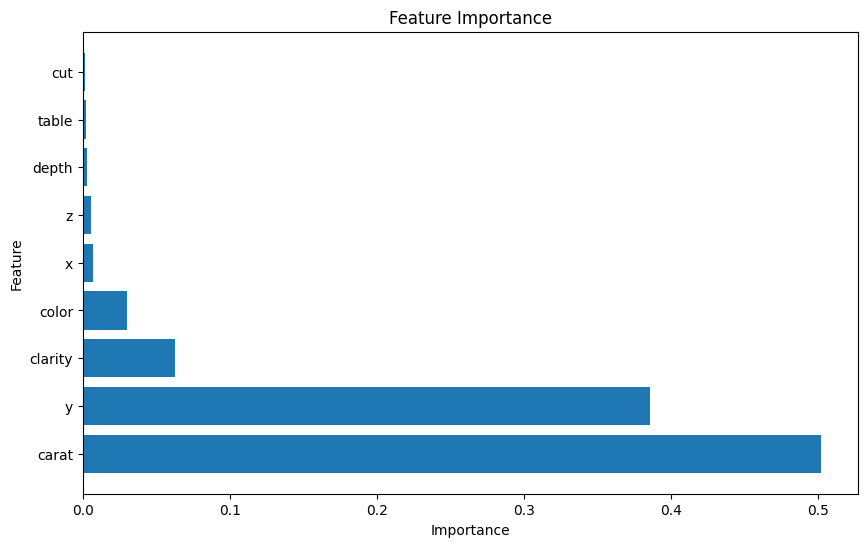

In [47]:
# prompt: zrób feature importance i narysuj z barplot

import matplotlib.pyplot as plt

# Get feature importances from the best model
feature_importances = best_rf_regressor.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()